モジュールの読み込み

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm
from sklearn import tree
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#「boston house price」というデータをロード
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
#boston house priceの上位5件を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM： 町別の犯罪率
* ZN： 25,000平方フィートを超える区画に分類される住宅地の割合
* INDUS： 町別の非小売業の割合
* CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）
* NOX： 一酸化窒素濃度（parts per 10 million単位）。
* RM： 1戸当たりの「平均部屋数」
* AGE： 1940年より前に建てられた持ち家の割合
* DIS： 5つあるボストン雇用センターまでの加重距離
* RAD： 主要高速道路へのアクセス性の指数
* TAX： 10,000ドル当たりの固定資産税率
* PTRATIO： 町別の「生徒と先生の比率」
* B： 「1000(Bk - 0.63)」の二乗値。ただし、Bk＝町ごとの黒人の割合
* LSTAT： 低所得者人口の割合
* PRICE：住宅価格（1000ドル単位）の中央値。(目的変数)

統計量

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 解釈

解釈を目的とする場合は、どの変数が目的変数に影響しているかを考えます。

教師あり学習の目的の一つ目は、解釈です。  
目的変数に対して、どの変数がどれくらい影響しているか、  
どの変数の組み合わせが目的変数に影響を与えているかを出します。  

解釈を目的とするために使用するモデルは線形回帰分析や、決定木などの単純でわかりやすいものが多いです。


## 線形回帰分析による解釈

解釈に重きを置く場合、偏回帰係数やp値を見て、どの変数が目的変数(PRICE)に対して効いているかを見ます。  

In [4]:
# 変数「CRIM」から「LSTAT」を説明変数として、「PRICE」を予測する
X = df.drop('PRICE',1)
y = df["PRICE"]

# add_constantで定数項を挿入
model = sm.OLS(y,sm.add_constant(X))
result = model.fit()
result.summary()

/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        22:37:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# 解釈しやすくするため、標準化します。
ss = preprocessing.StandardScaler()
df_standard= pd.DataFrame(ss.fit_transform(df),columns=df.columns)

# 変数「CRIM」から「LSTAT」を説明変数として、「PRICE」を予測する
X = df_standard.drop('PRICE',1)
y = df_standard["PRICE"]

# add_constantで定数項を挿入
model = sm.OLS(y,sm.add_constant(X))
result = model.fit()
result.summary()

/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        22:37:50   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.909e-16      0.023  -2.14e-14      1.000      -0.045       0.045
CRIM          -0.1010      0.031     -3.287      0.001      -0.161      -0.041
ZN             0.1177      0.035      3.382      0.001       0.049       0.186
INDUS          0.0153      0.046      0.334      0.738      -0.075       0.105
CHAS           0.0742      0.024      3.118      0.002       0.027       0.121
NOX           -0.2238      0.048     -4.651      0.000      -0.318      -0.129
RM             0.2911      0.032      9.116      0.000       0.228       0.354
AGE            0.0021      0.040      0.052      0.958      -0.077       0.082
DIS           -0.3378      0.046     -7.398      0.000      -0.428      -0.248
RAD            0.2897      0.063      4.613      0.000       0.166       0.413
TAX           -0.2260      0.069     -3.280      0.001      -0.361      -0.091
PTRATIO       -0.2243      0.031     -7.283      0.000      -0.285      -0.164
B              0.0924      0.027      3.467      0.001       0.040       0.145
LSTAT         -0.4074      0.039    -10.347      0.000      -0.485      -0.330
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 決定木による解釈

決定木の場合は、木を描いて可視化します。  
解釈する場合は、クロスバリデーションするより、全体で分析することが多いです。  
(ただし、精度を見たい場合は、hold-outやクロスバリデーションをしましょう。)

In [6]:
clf = tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=50)
clf = clf.fit(X,y)

[Text(418.5, 380.52, 'RM <= 0.935\nmse = 1.0\nsamples = 506\nvalue = -0.0'),
 Text(334.8, 271.8, 'LSTAT <= 0.245\nmse = 0.477\nsamples = 430\nvalue = -0.283'),
 Text(167.4, 163.07999999999998, 'RM <= 0.368\nmse = 0.308\nsamples = 255\nvalue = 0.089'),
 Text(83.7, 54.360000000000014, 'mse = 0.241\nsamples = 199\nvalue = -0.048'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.242\nsamples = 56\nvalue = 0.577'),
 Text(502.20000000000005, 163.07999999999998, 'CRIM <= 0.393\nmse = 0.228\nsamples = 175\nvalue = -0.825'),
 Text(418.5, 54.360000000000014, 'mse = 0.135\nsamples = 101\nvalue = -0.587'),
 Text(585.9, 54.360000000000014, 'mse = 0.174\nsamples = 74\nvalue = -1.149'),
 Text(502.20000000000005, 271.8, 'mse = 0.944\nsamples = 76\nvalue = 1.6')]

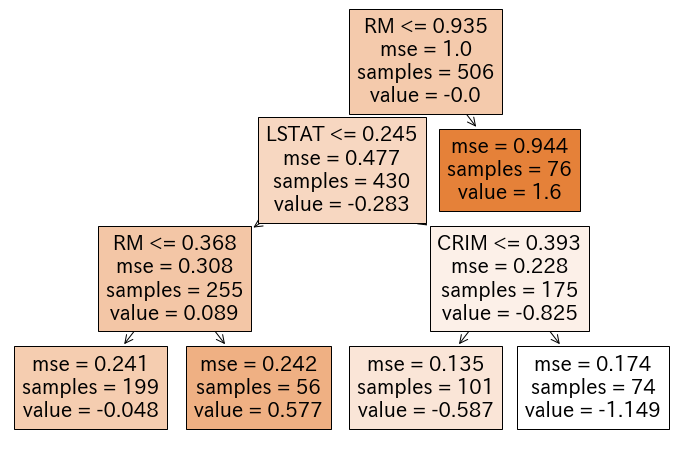

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=X.columns, filled=True)

解釈性を重視する場合、訓練データと検証データを分けずに全体でモデルを作成する場合もよくあります。

## 目的変数との散布図

目的変数に対して、RMが正の、LSTATが負の相関にあることがわかります。

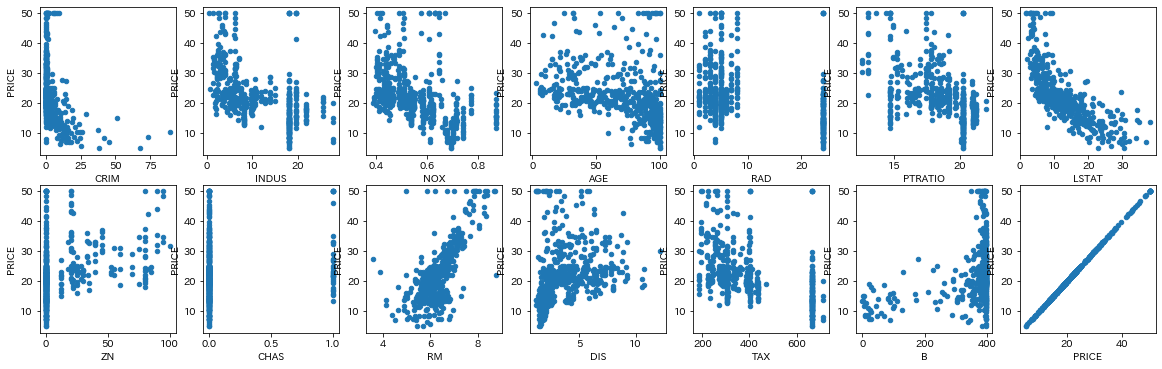

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=len(df.columns)//2, figsize=(20, 6))
for i,c in enumerate(df.columns):
    df.plot.scatter(x=c,y="PRICE",ax= axes[i%2,i//2])

# 予測

教師あり学習の目的の二つ目は、予測です。  
予測では、精度や未知データの当てはまりを第一に考えます。   
したがって、教師データと検証データに必ず分割して、教師データで学習を行い、検証データで評価を行う必要があります。  
そして、予測を行う際は、教師データと検証データの分け方、評価方法、評価指標、将来のデータと学習するデータが一致しているかなどを気にします。   
モデルは、LightGBMなどの変数の解釈が難しいが、高精度なモデルを使用する場合が多いです。  
ただし、今回は解釈性で使用したモデルと合わせて線形回帰で予測してみることにします。

## 線形回帰で予測

K-Foldクロスバリデーションで予測値を出し、RMSEで精度を測ります。

In [9]:
# 変数「CRIM」から「LSTAT」を説明変数として、「PRICE」を予測する
X = df.drop('PRICE',1)
y = df["PRICE"]

# 予測では、精度が重要なので、クロスバリデーションなどで検証します。
kf = KFold(n_splits=5)
scores = []
for i,(train_index, valid_index) in enumerate(kf.split(X)):
    # X,yをtrain, validに分割します。
    X_train, X_valid, y_train, y_valid = X.iloc[train_index],X.iloc[valid_index],y.iloc[train_index],y.iloc[valid_index]
    model = sm.OLS(y_train,sm.add_constant(X_train,has_constant='add'))
    result = model.fit()
    #  学習したモデルをvalidに適用します。。
    preds = result.predict(sm.add_constant(X_valid,has_constant='add'))
    scores.append(np.sqrt(mean_squared_error(y_valid,preds)))
print("クロスバリデーションスコア")
print(pd.Series(scores))
print("")
print("クロスバリデーションスコアの平均")
print(pd.Series(scores).mean())


クロスバリデーションスコア
0    3.529915
1    5.103785
2    5.751012
3    8.986789
4    5.771794
dtype: float64

クロスバリデーションスコアの平均
5.828658946215761


/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1

## 決定木で予測

In [10]:
# 変数「CRIM」から「LSTAT」を説明変数として、「PRICE」を予測する
X = df.drop('PRICE',1)
y = df["PRICE"]

# 予測では、精度が重要なので、クロスバリデーションなどで検証します。
kf = KFold(n_splits=5)
scores = []
for i,(train_index, valid_index) in enumerate(kf.split(X)):
    # X,yをtrain, validに分割します。
    X_train, X_valid, y_train, y_valid = X.iloc[train_index],X.iloc[valid_index],y.iloc[train_index],y.iloc[valid_index]
    clf = tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=50)
    clf = clf.fit(X_train,y_train)
    preds = clf.predict(X_valid)
    scores.append(np.sqrt(mean_squared_error(y_valid,preds)))

print("クロスバリデーションスコア")
print(pd.Series(scores))
print("")
print("クロスバリデーションスコアの平均")
print(pd.Series(scores).mean())


クロスバリデーションスコア
0    3.744893
1    4.919490
2    6.457667
3    7.676676
4    6.355734
dtype: float64

クロスバリデーションスコアの平均
5.830892083009374


/Users/sekineshingo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


線形回帰と決定木のRMSEを比較すると、わずかに線形回帰の方がRMSEが低いのでいいスコアです。

予測を重視する場合は、訓練データと検証データに必ず分割して、訓練データで学習を行い、検証データで評価を行う必要があります。

分析手法は同じでも、目的によって見るべきポイント、データの使い方などが異なってくるので、  
今の分析は解釈、予測どちらを重視しているのか意識してみてください！